<a href="https://colab.research.google.com/github/yasuhiroinoue/AppMathSci/blob/main/%E5%BF%9C%E7%94%A8%E6%95%B0%E7%90%86(2021_10_11).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##応用数理科学（第2回）
**成長と減衰**
$$dy/dx=ky$$

In [80]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt

#**薬の服用**
薬の服用により、薬用成分の血中濃度の動態を知ることは薬理学にとってとても重要。
y=y(t)が時刻tにおける薬の血中濃度を表すものとする。
もっとも簡単なモデルは、濃度の変化速度は、濃度に比例すると仮定することで得られる以下の微分方程式である。
$$ \frac{dy}{dt} = -ky$$
薬の服用を時間間隔Tで行い、すぐに吸収され血中に移行すると仮定する。血中に移行した薬の濃度S(t)は、次のようにあらわされる。
$$S(t)=S_0\delta(t-nT)$$
（本来は、服用から血中濃度が最大値になるまでに有限の時間T_maxがかかるが、濃度減少の時定数T_1/2と比較して、T_maxが短ければ、このように近似することができる）

最終的に、血中濃度の時間変化を表す式は以下となる
$$ \frac{dy}{dt} = -ky + S_0\delta(t-nT)$$

In [319]:
dt=0.0125#1/80
num=10*80#１０日間シミュレーション
T=1/dt
k=math.log(2)/(15/24)#ロラタジン（クラリチン）の半減期=15時間=15/24日

Dose=1
yDose=Dose
y=np.zeros(num)
yo=np.zeros(num)
time=np.zeros(num)
YO=yDose/(1-math.exp(-k*T*dt))
Y=yDose
yo[0] = YO
y[0]=Y

time[0]=0

print(k)
print(y[0],yo[0])
#半減期が短いほど、すぐに定常に達する。半減期が長い薬の場合（たとえば４８時間）はどうなるかも確認してみよう

1.1090354888959124
1.0 1.4922633109330912


In [324]:
for t in range(1,num):
  time[t]=t*dt
  if(t%T==0):
    yDose=Dose
  else:
    yDose=0
  YO=yo[t-1]
  Y=y[t-1]
  deltaYO = -k*YO*dt*0.5
  deltaY = -k*Y*dt*0.5

  halfYO = YO+deltaYO
  halfY = Y+deltaY
  
  deltaYO = -k*halfYO*dt + yDose
  deltaY = -k*halfY*dt+yDose

  YO+=deltaYO
  Y+=deltaY
  if(Y<0):
    YO=0
    Y=0
  yo[t]=YO
  y[t]=Y

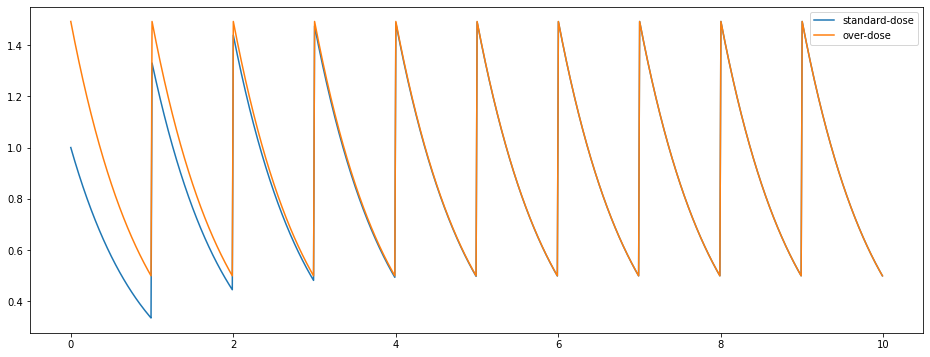

In [325]:
plt.figure(figsize=(16,6))
plt.plot(time,y,label="standard-dose")
plt.plot(time,yo,label="over-dose")
plt.legend()

#**演習問題**
絶食実験で、ボランティアの体重は、３０日間に80㎏から70kgに減った。1日当たりの減
量はボランティアの体重に比例することが分かっている。この性質を表す数理モデルを作り、ボランティアの体重が60kgになるのに、何日かかるか推定しなさい



In [ ]:
##コードをここから書きなさい

薬の服用においては、有限時間で血中濃度が最大値となることを考慮して、上記の微分方程式を改良しなさい
[参考図 wikipedia](https://ja.wikipedia.org/wiki/%E5%8D%8A%E6%B8%9B%E6%9C%9F_(%E8%96%AC%E5%AD%A6)#/media/%E3%83%95%E3%82%A1%E3%82%A4%E3%83%AB:Linear_PK_Example.png)

In [ ]:
##コードをここから書きなさい